In [1]:
import pandas as pd

from GA.GeneticAlgorithm import GeneticAlgorithm
from function_modules.function_module import *

In [2]:
kwargs = {
    'cnn_model_path': '../../Models/CNN_7_0.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'seed': 0,
}

In [3]:
ga = GeneticAlgorithm(
    **kwargs,
    target_expression=-0.5,
    selection_method='selTournament',
    track_history=True,
)
ga.run(3)
print(ga.convergence_history)

Instructions for updating:
Use tf.identity with explicit device placement instead.
[[0.7171380471380472, 0.6866329966329967, 0.5872255892255892, 0.4884579124579125, 0.356026936026936, 0.3482626262626263, 0.3161010101010101, 0.2567272727272727, 0.23228956228956227, 0.26364983164983163, 0.2957037037037037, 0.31077441077441076, 0.22606060606060607, 0.18684848484848485, 0.16635016835016833, 0.14146801346801346, 0.06852525252525252, 0.03430303030303031, 0.021872053872053872, 0.04008754208754209, 0.03560942760942761, 0.025164983164983164, 0.027784511784511783, 0.01859259259259259, 0.02313131313131313, 0.028363636363636365, 0.028370370370370372, 0.030343434343434342, 0.02432996632996633, 0.0343973063973064, 0.025097643097643098, 0.027131313131313135, 0.03424242424242424, 0.030437710437710437, 0.02321885521885522, 0.023185185185185184, 0.031003367003367005, 0.03433670033670034, 0.025097643097643098, 0.029097643097643098, 0.029124579124579122, 0.040835016835016835, 0.03756228956228956, 0.034875

In [3]:
param_ranges = {
    'selection_method' : ['selRandom', 'selBest'],
}
target_expressions = [-0.5]
lineages = 3

results_dfs = test_param_convergence(param_ranges, target_expressions, lineages, kwargs)

Processing combinations:   0%|          | 0/2 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


Processing combinations: 100%|██████████| 2/2 [00:33<00:00, 16.56s/it, Elapsed=33.12s, ETA=0.00s] 


In [4]:
results_dfs[('selRandom',)].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
min_convergence_history,0.732687,0.722465,0.706485,0.688074,0.678815,0.660754,0.647724,0.620889,0.624970,0.606505,...,0.489481,0.478451,0.497199,0.490727,0.480088,0.507838,0.497475,0.486269,0.475178,0.466357
max_convergence_history,0.739616,0.728269,0.717980,0.713118,0.696027,0.699387,0.685246,0.685030,0.682875,0.662094,...,0.510828,0.516519,0.534525,0.536956,0.545495,0.548727,0.540458,0.533966,0.545448,0.560505
mean_convergence_history,0.736599,0.725165,0.710949,0.701879,0.689827,0.679282,0.666999,0.654088,0.651818,0.638485,...,0.501735,0.502943,0.510570,0.513030,0.506238,0.521612,0.512141,0.513975,0.515235,0.518714


In [12]:
def convergence_fill_between(results_dfs, color='tab10', figsize=(14, 6)):
    '''
    Plot the hamming distance convergence using fill_between to show min, average, and max.
    Takes in a dataframe of results with rows of lineages and columns of generations.
    '''
    fig, ax = plt.subplots(figsize=figsize)

    # Assign colors using colormap
    color_map = plt.get_cmap(color)
    color_mapping = {name: color_map(i) for i, name in enumerate(results_dfs.keys())}

    # Plot the convergence history for dataframe
    for params, df in results_dfs.items():
        generations = df.columns
        ax.fill_between(generations, df.loc['min_convergence_history'], df.loc['max_convergence_history'], alpha=0.3)
        ax.plot(generations, df.loc['mean_convergence_history'], color=color_mapping[params], linestyle='-', linewidth=2, label=params)
    
    ax.set_xlabel('Generation')
    ax.set_ylabel('Hamming Distance')
    ax.set_title('Hamming Distance Convergence')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))
    plt.show()

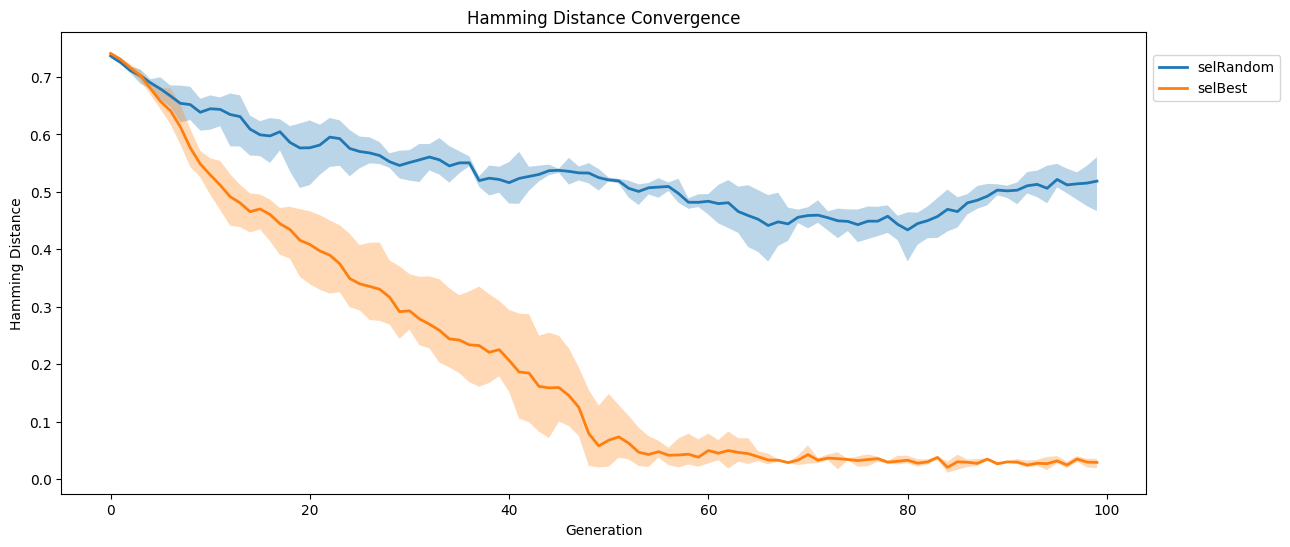

In [13]:
convergence_fill_between(results_dfs)